<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/METODO_IMPLICITO(EC.%20CALOR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECUACIÓN DE CALOR**

***MÉTODO IMPLÍCITO DE CRANK-NICOLSON***


$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} \quad (0 < x < 1)
$$

$$u = 0 \quad \text{at} \quad x = 0, x = 1, t \geq 0$$

$$u = 1 - 4\left(x - \frac{1}{2}\right)^2 \quad \text{for} \quad t = 0 \quad \text{and} \quad 0 \leq x \leq 1$$

Esto representa a la ecuación del calor en una dimensión, donde se supone que el calor modelado en una barra, la barra tiene extremos a temperatura cero (extremos fríos).

\vspace{0.5cm}
Vamos a considerar la siguiente relación (relación de estabilidad):
$$
r = \frac{\alpha^2 k}{h^2}
$$

In [2]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from tabulate import tabulate         # PARA LA CREACION DE TABLAS

import math                           # PARA SOLUCION EXACTA


In [4]:
# PARAMETROS
alpha = 1.0     # Coeficiente de difusividad
h = 1/10        # Tamaño del paso espacial
k = 0.01        # Tamaño del paso temporal
r = alpha**2 * k / h**2 # Parámetro de convergencia y estabilidad

# Discretización Espacial
x = np.arange(0, 1 + h, h)  # Malla completa (incluye fronteras)
x_in = x[1:-1]              # Solo puntos interiores
n = len(x_in)               # Dimensión de la matriz A

# Condiciones de Frontera (Dirichlet)
def u_izq(t):
    return 0.0 # u(0, t) = 0

def u_der(t):
    return 0.0 # u(1, t) = 0

#  Condición Inicial (t=0)
def u0_func(x):
    # u(x, 0) = 1 - 4(x-1/2)^2
    return 1 - 4*(x - 0.5)**2

f = u0_func(x_in) # Vector de valores iniciales para los puntos interiores

In [6]:
# METÓDO IMPLÍCITO DE Crank-Nicolson

def matrices_crank_nicolson(n, r):
    # Inicializa las matrices A (Implícita) y B (Explícita) como matrices n x n de SymPy.
    A = sp.zeros(n, n)
    B = sp.zeros(n, n)

    # Construye los elementos de las matrices A y B
    for i in range(n):
        # Diagonal principal
        A[i, i] = 1 + r
        B[i, i] = 1 - r

        if i > 0: # Subdiagonal inferior (i, i-1)
            A[i, i-1] = -r/2
            B[i, i-1] = r/2

        if i < n-1: # Superdiagonal superior (i, i+1)
            A[i, i+1] = -r/2
            B[i, i+1] = r/2

    return A, B

# Calcula y asigna las matrices tridiagonales A y B usando los parámetros n y r.
AC, BC = matrices_crank_nicolson(n, r)

In [7]:
AC

Matrix([
[ 2.0, -0.5,    0,    0,    0,    0,    0,    0,    0],
[-0.5,  2.0, -0.5,    0,    0,    0,    0,    0,    0],
[   0, -0.5,  2.0, -0.5,    0,    0,    0,    0,    0],
[   0,    0, -0.5,  2.0, -0.5,    0,    0,    0,    0],
[   0,    0,    0, -0.5,  2.0, -0.5,    0,    0,    0],
[   0,    0,    0,    0, -0.5,  2.0, -0.5,    0,    0],
[   0,    0,    0,    0,    0, -0.5,  2.0, -0.5,    0],
[   0,    0,    0,    0,    0,    0, -0.5,  2.0, -0.5],
[   0,    0,    0,    0,    0,    0,    0, -0.5,  2.0]])

In [8]:
BC

Matrix([
[2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
[                 0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0],
[                   0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0],
[                   0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0],
[                   0,                    0,                    0,                  0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,               

In [10]:
def crank_nicolson(A, B, f, m):
    # Inicializa el almacenamiento de soluciones
    S = []
    u = sp.Matrix(f)

    for j in range(m + 1):
        # Almacena la solución actual (u^j)
        S.append(np.array(u, dtype=float).reshape(-1))

        # Resuelve el sistema lineal para obtener u^{j+1}
        # Ecuación: A * u^{j+1} = B * u^j
        b = B * u
        u = A.LUsolve(b)

    return np.array(S)

# Ejecución de la Simulación
t_max = 0.10
m = int(t_max / k)

# Ejecuta el método y guarda las soluciones
U = crank_nicolson(AC, BC, f, m)

**EJERCICIO 1**

In [11]:
t_vals = np.arange(0, t_max + k/2, k)   # 0, 0.01, ..., 0.10

xs = 5

tabla = []
for j, t in enumerate(t_vals):
    fila = [t]        # tiempo
    fila.append(0.0)  # x = 0

    for i in range(xs):
        fila.append(U[j, i])
    tabla.append(fila)

encabezados = ["t", "x = 0.0", "0.1", "0.2", "0.3", "0.4", "0.5"]

print(tabulate(tabla, headers=encabezados,
               tablefmt="github", floatfmt=".4f"))


|      t |   x = 0.0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |
|--------|-----------|--------|--------|--------|--------|--------|
| 0.0000 |    0.0000 | 0.3600 | 0.6400 | 0.8400 | 0.9600 | 1.0000 |
| 0.0100 |    0.0000 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 |
| 0.0200 |    0.0000 | 0.2676 | 0.5048 | 0.6885 | 0.8030 | 0.8417 |
| 0.0300 |    0.0000 | 0.2399 | 0.4548 | 0.6231 | 0.7300 | 0.7665 |
| 0.0400 |    0.0000 | 0.2164 | 0.4110 | 0.5646 | 0.6626 | 0.6963 |
| 0.0500 |    0.0000 | 0.1958 | 0.3721 | 0.5117 | 0.6011 | 0.6319 |
| 0.0600 |    0.0000 | 0.1773 | 0.3372 | 0.4639 | 0.5452 | 0.5731 |
| 0.0700 |    0.0000 | 0.1607 | 0.3056 | 0.4206 | 0.4943 | 0.5197 |
| 0.0800 |    0.0000 | 0.1457 | 0.2771 | 0.3813 | 0.4482 | 0.4713 |
| 0.0900 |    0.0000 | 0.1321 | 0.2512 | 0.3457 | 0.4064 | 0.4273 |
| 0.1000 |    0.0000 | 0.1197 | 0.2277 | 0.3135 | 0.3685 | 0.3875 |


**EJERCICIO 2**

In [21]:
#Función analítica de la solución

def u_ex(x, t, N=201):

    s = 0.0
    for k in range(N):
        n = 2*k + 1
        b_n = 32.0 / (math.pi**3 * n**3)
        s += b_n * math.exp(-(n*math.pi)**2 * t) * math.sin(n*math.pi * x)
    return s

In [23]:
# Cálculo y Comparación con la Solución Exacta

# Inicializa los instantes de tiempo
t_vals = np.linspace(0, t_max, m + 1)

# Inicializa la matriz para guardar la solución exacta
U_ex = np.zeros_like(U)

# Rellena la matriz de la solución exacta (U_ex)
for j, t in enumerate(t_vals):
    for i, xi in enumerate(x_in):
        U_ex[j, i] = u_exact(xi, t)

# Calcula la matriz de error absoluto
error = np.abs(U - U_ex)
# Error máximo global
error_max = np.max(error)


# Comparación en un Instante Específico
t_obj = 0.10
j_obj = int(round(t_obj / k))

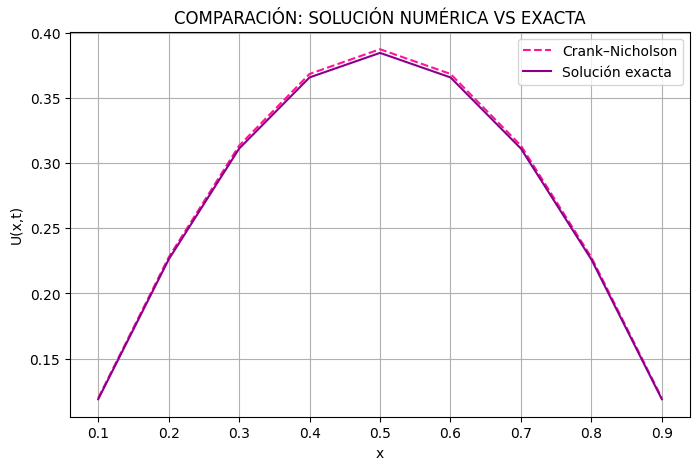

In [26]:
# Construimos la gráfica para comparar la solución numérica y la exacta

plt.figure(figsize=(8,5))

# Solución de Crank-Nicolson
plt.plot(x_in, U[j_obj, :], '--', color='deeppink' ,label='Crank–Nicholson')

# Solución exacta
plt.plot(x_in, U_ex[j_obj, :], color='darkmagenta' ,label='Solución exacta')

plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('COMPARACIÓN: SOLUCIÓN NUMÉRICA VS EXACTA') # Título ligeramente mejorado
plt.grid(True)
plt.legend()
plt.show()